## Tomorrow.io Data Extraction 

Things to do in this notebook 

* Get shapefile of Delhi
* Get temperatyre and humidity of Delhi to corresponding H3 datasets

In [1]:
import geopandas as gpd

### Import 

Get Delhi Shapefiles

In [3]:
delhi = gpd.read_file('../data/delhi-shapefiles/Delhi-polygon.shp')
delhi.plot()

<AxesSubplot:>

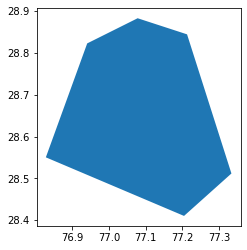

In [5]:
import pandas as pd 

pd.set_option('max_colwidth', 400)
print(delhi['geometry'])

0    POLYGON ((77.21282 28.84425, 77.33367 28.51172, 77.20458 28.41030, 76.82829 28.55033, 76.94090 28.82260, 77.07823 28.88274, 77.21282 28.84425))
Name: geometry, dtype: geometry


In [ ]:
# India polygon 

#  [[[76.87032, 36.14508], [79.85860, 29.04476],[ 88.12032, 26.08453], [89.08712, 22.31768], 
#     [80.12227, 15.41992], [79.77071, 9.84777], [77.39766, 8.28556], [73.79415, 15.25040],[ 72.38790, 20.51771], [68.69649, 22.07355]
#     , [69.48751, 24.41526], [71.42110, 24.41526], [69.57540, 27.02793], [70.54219, 27.96347], [71.77266, 28.11862],
#      [74.93672, 31.84781], [73.70626, 34.27821], [73.09102, 36.35771], [76.87032, 36.14508]]]

### Get data from tomorrow.io for two Delhi summers and compare them

In [7]:
import requests

url = "https://api.tomorrow.io/v4/historical?apikey=uyOL03vZtbjfkTwKIRFyzO1HOcgoigaa"
#vfi9ZnsyLYawkZY9wRAE4FyH7fX9fU34"

payload = {
    "location": {"type":"Polygon", "coordinates":  [[[77.21282, 28.84425], [77.33367, 28.51172], [77.20458,28.41030], [76.82829, 28.55033], [76.94090, 28.82260],[ 77.07823, 28.88274], [77.21282, 28.84425]]]},
    # #[[[76.87032, 36.14508], [79.85860, 29.04476],[ 88.12032, 26.08453], [89.08712, 22.31768], 
    # [80.12227, 15.41992], [79.77071, 9.84777], [77.39766, 8.28556], [73.79415, 15.25040],[ 72.38790, 20.51771], [68.69649, 22.07355]
    # , [69.48751, 24.41526], [71.42110, 24.41526], [69.57540, 27.02793], [70.54219, 27.96347], [71.77266, 28.11862],
    #  [74.93672, 31.84781], [73.70626, 34.27821], [73.09102, 36.35771], [76.87032, 36.14508]]]},
    #,
    "fields": ["temperature"],
    "timesteps": ["1d"],
    "startTime": "2020-04-28T14:09:50Z",
    "endTime": "2020-04-29T14:09:50Z",
    "units": "metric"
}
headers = {
    "Accept": "application/json",
    "Accept-Encoding": "gzip",
    "Content-Type": "application/json"
}

response = requests.post(url, json=payload, headers=headers)

#print(response.text)

In [8]:
print(response.text)

{"data":{"timelines":[{"timestep":"1d","endTime":"2020-04-29T00:00:00Z","startTime":"2020-04-28T00:00:00Z","intervals":[{"startTime":"2020-04-28T00:00:00Z","values":{"temperature":32.68}},{"startTime":"2020-04-29T00:00:00Z","values":{"temperature":34.96}}]}]}}


In [68]:
delhisummer20 = ast.literal_eval(response.text)
delhisummer20 = pd.DataFrame(delhisummer20['data']['timelines'][0]['intervals'])


<AxesSubplot:>

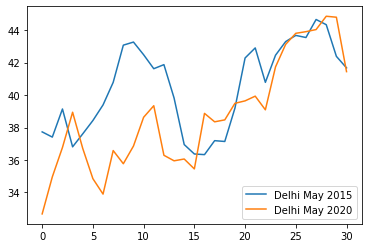

In [82]:
# df = delhisummer15['values'].apply(pd.Series)
# df.rename(columns = {'temperature':'Delhi May 2015'}, inplace = True)

# ax = df.plot()

df = delhisummer20['values'].apply(pd.Series)
df.rename(columns = {'temperature':'Delhi May 2020'}, inplace = True)

df.plot(ax=ax)